 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [223]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [81]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns = pd.read_csv(whale_returns_csv)

whale_returns.head()


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [82]:
# Count nulls
# YOUR CODE HERE
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [83]:
# Drop nulls
# YOUR CODE HERE
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [84]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns = pd.read_csv(algo_returns_csv)

In [85]:
# Count nulls
# YOUR CODE HERE
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [86]:
# Drop nulls
# YOUR CODE HERE
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()
algo_returns.head

<bound method NDFrame.head of             Date    Algo 1    Algo 2
6     2014-06-05  0.004062  0.013285
7     2014-06-06  0.001857  0.008284
8     2014-06-09 -0.005012  0.005668
9     2014-06-10  0.004406 -0.000735
10    2014-06-11  0.004760 -0.003761
...          ...       ...       ...
1236  2019-04-25  0.000682 -0.007247
1237  2019-04-26  0.002981  0.005256
1238  2019-04-29  0.005208  0.002829
1239  2019-04-30 -0.002944 -0.001570
1240  2019-05-01  0.000094 -0.007358

[1235 rows x 3 columns]>

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [87]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [88]:
# Check Data Types
# YOUR CODE HERE
sp500_history.dtypes

Close    object
dtype: object

In [89]:
# Fix Data Types
# YOUR CODE HERE
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')
sp500_history['Close'] = sp500_history['Close'].astype(float)

sp500_history.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [90]:
sp500_history.dtypes
sp500_history.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [91]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [92]:
# Drop nulls
# YOUR CODE HERE
sp500_returns = sp500_returns.dropna()
sp500_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [93]:
# Rename Column
# YOUR CODE HERE
sp500_returns = sp500_returns.rename(columns={'Close':"S&P 500"})
sp500_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [94]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
whale_returns = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
combined_portfolio = pd.concat([whale_returns, algo_returns, sp500_returns], axis = "columns", join = "inner")
combined_portfolio.head(600)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.004559
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
...,...,...,...,...,...,...,...
2017-07-11,0.001230,0.002412,0.009061,0.008142,0.001447,-0.000231,-0.007253
2017-07-12,0.008579,0.009610,0.010821,0.013334,0.000013,0.009602,-0.001871
2017-07-13,0.001202,0.003304,0.002360,0.001474,0.002725,0.004021,-0.004652


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

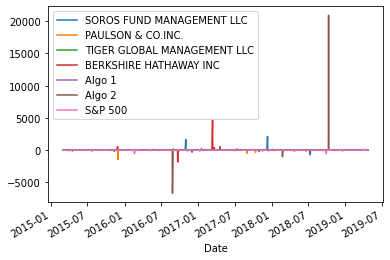

In [96]:
# Plot daily returns
# YOUR CODE HERE
combined_portfolio_returns = combined_portfolio.pct_change()
combined_portfolio_returns.plot()

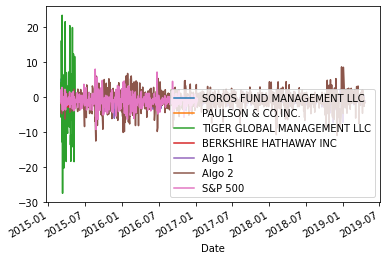

In [112]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_combined_portfolio_returns = (1 + combined_portfolio_returns).cumprod() - 1
cumulative_combined_portfolio_returns.head()
cumulative_combined_portfolio_returns.plot(kind = 'line')

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

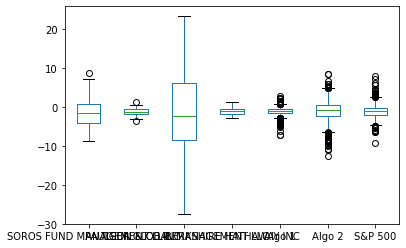

In [120]:
# Box plot to visually show risk
# YOUR CODE HERE
cumulative_combined_portfolio_returns.plot(kind = 'box')


In [119]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
Standard_Deviation = np.std(cumulative_combined_portfolio_returns)
print(Standard_Deviation)


SOROS FUND MANAGEMENT LLC       4.099790
PAULSON & CO.INC.               0.848403
TIGER GLOBAL MANAGEMENT LLC    11.525704
BERKSHIRE HATHAWAY INC          1.006416
Algo 1                          0.933960
Algo 2                          2.605380
S&P 500                         1.980972
dtype: float64


In [122]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
#???
#####SOROS, TIGER and Algo 2 are riskier than S+P 500 ####

In [121]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
#The annualized standard deviation of daily returns is calculated as follows: Annualized Standard Deviation = Standard Deviation of Daily Returns * Square Root (250) Here, we assumed that there were 250 trading days in the year.
Annualized_Standard_Deviation = np.std(cumulative_combined_portfolio_returns)*15.8113
print(Annualized_Standard_Deviation)

SOROS FUND MANAGEMENT LLC       64.823006
PAULSON & CO.INC.               13.414352
TIGER GLOBAL MANAGEMENT LLC    182.236356
BERKSHIRE HATHAWAY INC          15.912751
Algo 1                          14.767129
Algo 2                          41.194439
S&P 500                         31.321744
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

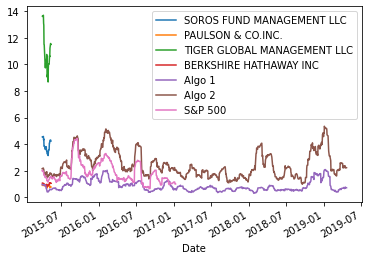

In [123]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
cumulative_combined_portfolio_returns.rolling(window=21).std().plot()

In [127]:
# Construct a correlation table
# YOUR CODE HERE
price_correlation = cumulative_combined_portfolio_returns.corr()
price_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.736194,0.851043,0.837398,0.260186,-0.793469,-0.062358
PAULSON & CO.INC.,0.736194,1.000000,0.733922,0.701082,0.088972,-0.725440,-0.013208
TIGER GLOBAL MANAGEMENT LLC,0.851043,0.733922,1.000000,0.802951,0.182693,-0.873316,-0.238080
BERKSHIRE HATHAWAY INC,0.837398,0.701082,0.802951,1.000000,0.182066,-0.825354,-0.080481
Algo 1,0.260186,0.088972,0.182693,0.182066,1.000000,-0.287852,0.017753
Algo 2,-0.793469,-0.725440,-0.873316,-0.825354,-0.287852,1.000000,0.000744
S&P 500,-0.062358,-0.013208,-0.238080,-0.080481,0.017753,0.000744,1.000000


In [130]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
cumulative_combined_portfolio_returns

covariance = cumulative_combined_portfolio_returns['SOROS FUND MANAGEMENT LLC'].cov(cumulative_combined_portfolio_returns['S&P 500'])
covariance

-0.432232411098077

In [131]:
variance = cumulative_combined_portfolio_returns['SOROS FUND MANAGEMENT LLC'].var()
variance

17.15130235464962

In [132]:
soros_beta = covariance / variance
print(soros_beta)

-0.025201142289984834


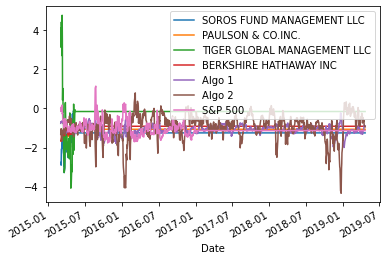

In [138]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
# Im using a smoothing factor of 0.1
moving_average = cumulative_combined_portfolio_returns.ewm(alpha=0.1, adjust=False).mean()
moving_average.plot()

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [140]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
Sharpe_Ratio = cumulative_combined_portfolio_returns.mean() / cumulative_combined_portfolio_returns.std()
Sharpe_Ratio

SOROS FUND MANAGEMENT LLC     -0.365425
PAULSON & CO.INC.             -1.350564
TIGER GLOBAL MANAGEMENT LLC   -0.150481
BERKSHIRE HATHAWAY INC        -1.042616
Algo 1                        -1.156471
Algo 2                        -0.353127
S&P 500                       -0.517132
dtype: float64

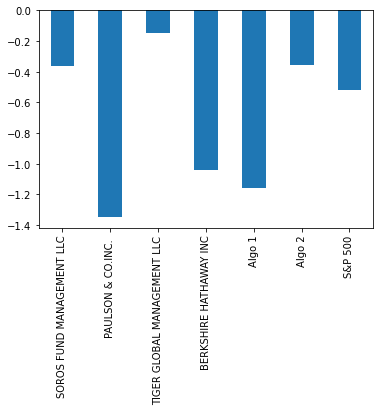

In [141]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
Sharpe_Ratio.plot(kind = 'bar')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

In [ ]:
# No, one Algo has a lower sharpe ration than the S+P 500 but the other does not. -Bjorn!

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [125]:
# Read the first stock
# YOUR CODE HERE
Reliance_csv = Path("Resources/Reliance.csv")
Reliance = pd.read_csv(Reliance_csv, dtype = object)
Reliance = Reliance.rename(columns={'Open':"Reliance"})
Reliance.head()

,Date,Reliance
0,6/4/2018 15:30:00,924.6
1,6/5/2018 15:30:00,933.91
2,6/6/2018 15:30:00,938.07
3,6/7/2018 15:30:00,945.9
4,6/8/2018 15:30:00,957.24


In [116]:
Reliance.dtypes

Date        object
Reliance    object
dtype: object

In [126]:
Reliance['Date'] = Reliance['Date'].str.replace('15:30:00', '') #THIS IS IMPORTANT TO CONCAT> SEE BELOW
Reliance.head()

,Date,Reliance
0,6/4/2018,924.6
1,6/5/2018,933.91
2,6/6/2018,938.07
3,6/7/2018,945.9
4,6/8/2018,957.24


In [141]:
Reliance.set_index('Date', inplace=True)
Reliance.head()

,Reliance
Date,
6/4/2018,924.6
6/5/2018,933.91
6/6/2018,938.07
6/7/2018,945.9
6/8/2018,957.24


In [132]:
# Read the second stock
# YOUR CODE HERE
Alphabet_csv = Path("Resources/Alphabet.csv")
Alphabet = pd.read_csv(Alphabet_csv, parse_dates=True, infer_datetime_format=True)
Alphabet = Alphabet.rename(columns={'Open':"Alphabet"})
Alphabet.head()

,Date,Alphabet
0,6/1/2018 16:00:00,1099.35
1,6/4/2018 16:00:00,1122.33
2,6/5/2018 16:00:00,1140.99
3,6/6/2018 16:00:00,1142.17
4,6/7/2018 16:00:00,1131.32


In [135]:
Alphabet['Date'] = Alphabet['Date'].str.replace('16:00:00', '') #THIS IS IMPORTANT TO CONCAT> SEE BELOW
Alphabet.head()

,Date,Alphabet
0,6/1/2018,1099.35
1,6/4/2018,1122.33
2,6/5/2018,1140.99
3,6/6/2018,1142.17
4,6/7/2018,1131.32


In [142]:
Alphabet.set_index('Date', inplace=True)
Alphabet.head()

,Alphabet
Date,
6/1/2018,1099.35
6/4/2018,1122.33
6/5/2018,1140.99
6/6/2018,1142.17
6/7/2018,1131.32


In [136]:
# Read the third stock
# YOUR CODE HERE
HewlettPackard_csv = Path("Resources/HewlettPackard.csv")
HewlettPackard = pd.read_csv(HewlettPackard_csv, parse_dates=True, infer_datetime_format=True)
HewlettPackard = HewlettPackard.rename(columns={'Open':"HewlettPackard"})
HewlettPackard.head()

,Date,HewlettPackard
0,6/1/2018 16:00:00,15.33
1,6/4/2018 16:00:00,15.50
2,6/5/2018 16:00:00,15.50
3,6/6/2018 16:00:00,16.11
4,6/7/2018 16:00:00,15.98


In [137]:
HewlettPackard['Date'] = HewlettPackard['Date'].str.replace('16:00:00', '') #THIS IS IMPORTANT TO CONCAT> SEE BELOW
HewlettPackard.head()

,Date,HewlettPackard
0,6/1/2018,15.33
1,6/4/2018,15.50
2,6/5/2018,15.50
3,6/6/2018,16.11
4,6/7/2018,15.98


In [143]:
HewlettPackard.set_index('Date', inplace=True)
HewlettPackard.head()

,HewlettPackard
Date,
6/1/2018,15.33
6/4/2018,15.50
6/5/2018,15.50
6/6/2018,16.11
6/7/2018,15.98


In [144]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
bjorn_custom_concat = pd.concat([HewlettPackard, Alphabet, Reliance], axis = "columns", join = "inner")
bjorn_custom_concat

,HewlettPackard,Alphabet,Reliance
Date,,,
6/4/2018,15.50,1122.33,924.6
6/5/2018,15.50,1140.99,933.91
6/6/2018,16.11,1142.17,938.07
6/7/2018,15.98,1131.32,945.9
6/8/2018,15.82,1118.18,957.24
...,...,...,...
6/3/2020,10.03,1438.30,1545
6/4/2020,10.20,1430.40,1544
6/5/2020,11.17,1413.17,1595


In [14]:
# Reset the index
# YOUR CODE HERE
##########I SET THE INDEX COLUMN AS DATE ALREADY ABOVE :) - Bjorn

In [ ]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
#########Renamed Columns ALREADY ABOVE :) - Bjorn

In [158]:
# Drop Nulls
# YOUR CODE HERE

bjorn_custom_concat = bjorn_custom_concat.dropna()
bjorn_custom_concat

,HewlettPackard,Alphabet,Reliance
Date,,,
6/4/2018,15.50,1122.33,924.60
6/5/2018,15.50,1140.99,933.91
6/6/2018,16.11,1142.17,938.07
6/7/2018,15.98,1131.32,945.90
6/8/2018,15.82,1118.18,957.24
...,...,...,...
6/3/2020,10.03,1438.30,1545.00
6/4/2020,10.20,1430.40,1544.00
6/5/2020,11.17,1413.17,1595.00


In [160]:
bjorn_custom_concat = bjorn_custom_concat.apply(pd.to_numeric)
bjorn_custom_concat

,HewlettPackard,Alphabet,Reliance
Date,,,
6/4/2018,15.50,1122.33,924.60
6/5/2018,15.50,1140.99,933.91
6/6/2018,16.11,1142.17,938.07
6/7/2018,15.98,1131.32,945.90
6/8/2018,15.82,1118.18,957.24
...,...,...,...
6/3/2020,10.03,1438.30,1545.00
6/4/2020,10.20,1430.40,1544.00
6/5/2020,11.17,1413.17,1595.00


In [163]:
#Calculate Returns
bjorn_returns = bjorn_custom_concat.pct_change()
bjorn_returns

,HewlettPackard,Alphabet,Reliance
Date,,,
6/4/2018,NaN,NaN,NaN
6/5/2018,0.000000,0.016626,0.010069
6/6/2018,0.039355,0.001034,0.004454
6/7/2018,-0.008070,-0.009499,0.008347
6/8/2018,-0.010013,-0.011615,0.011989
...,...,...,...
6/3/2020,0.016211,0.005417,0.012451
6/4/2020,0.016949,-0.005493,-0.000647
6/5/2020,0.095098,-0.012046,0.033031


In [243]:
bjorn_returns.index = pd.to_datetime(bjorn_returns.index)
bjorn_returns

,HewlettPackard,Alphabet,Reliance
Date,,,
2018-06-04,NaN,NaN,NaN
2018-06-05,0.000000,0.016626,0.010069
2018-06-06,0.039355,0.001034,0.004454
2018-06-07,-0.008070,-0.009499,0.008347
2018-06-08,-0.010013,-0.011615,0.011989
...,...,...,...
2020-06-03,0.016211,0.005417,0.012451
2020-06-04,0.016949,-0.005493,-0.000647
2020-06-05,0.095098,-0.012046,0.033031


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [244]:
# Calculate weighted portfolio returns
#####weights = [1/3, 1/3, 1/3]
Relianceweight = 1/3
Alphabetweight = 1/3
HewlettPackardweight = 1/3
# YOUR CODE HERE
bjorn_portfolio_returns = Alphabetweight * bjorn_returns["Alphabet"] + HewlettPackardweight * bjorn_returns["HewlettPackard"] + Relianceweight * bjorn_returns["Reliance"]
bjorn_portfolio_returns

Date
2018-06-04         NaN
2018-06-05    0.008898
2018-06-06    0.014948
2018-06-07   -0.003074
2018-06-08   -0.003213
                ...   
2020-06-03    0.011360
2020-06-04    0.003603
2020-06-05    0.038695
2020-06-08    0.015707
2020-06-09   -0.014134
Length: 471, dtype: float64

In [227]:
bjorn_portfolio_returns.asdtypes
bjorn_portfolio_returns = pd.DataFrame(myarray,columns=['a','b'], dtype={'a': 'int'})

dtype('O')

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [274]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
combined_with_bjorn_portfolio_returns = pd.concat([combined_portfolio_returns, bjorn_portfolio_returns], axis = "columns", join = "inner")
combined_with_bjorn_portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
Date,,,,,,,,
2018-06-04,0.148999,-2.160373,1.146796,-0.290082,-1.531019,-1.046454,-0.842560,NaN
2018-06-05,-0.873494,-2.597580,-1.559215,-0.002501,0.061337,-15.587765,11.098421,0.008898
2018-06-06,13.147100,0.420843,-1.700102,0.108327,-5.057326,0.014516,-1.084137,0.014948
2018-06-07,-1.086160,-0.072620,-1.481217,-2.287714,-1.909386,-1.495088,-5.360108,-0.003074
2018-06-08,-2.943675,-0.151161,-5.832965,-1.628934,-1.163502,-1.489841,-0.657410,-0.003213
...,...,...,...,...,...,...,...,...
2019-04-12,0.662481,-0.705739,-7.617165,-15.737949,-4.226684,-3.873464,-1.095922,0.010260
2019-04-15,-1.251107,-0.007347,-0.905642,-2.434236,-0.212628,-2.014920,-1.808331,0.000360
2019-04-16,-2.898341,-1.335693,-3.088322,-1.079744,0.603391,-1.634218,-5.476395,0.004768


In [275]:
combined_with_bjorn_portfolio_returns.rename(columns = {'0':'Bjorn Hedge Fund'}, inplace = True)

In [276]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
combined_with_bjorn_portfolio_returns.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
Date,,,,,,,,
2018-06-05,-0.873494,-2.597580,-1.559215,-0.002501,0.061337,-15.587765,11.098421,0.008898
2018-06-06,13.147100,0.420843,-1.700102,0.108327,-5.057326,0.014516,-1.084137,0.014948
2018-06-07,-1.086160,-0.072620,-1.481217,-2.287714,-1.909386,-1.495088,-5.360108,-0.003074
2018-06-08,-2.943675,-0.151161,-5.832965,-1.628934,-1.163502,-1.489841,-0.657410,-0.003213
2018-06-11,1.933413,-0.419135,0.599900,-1.070992,-0.452588,0.413756,0.630155,0.010235
...,...,...,...,...,...,...,...,...
2019-04-12,0.662481,-0.705739,-7.617165,-15.737949,-4.226684,-3.873464,-1.095922,0.010260
2019-04-15,-1.251107,-0.007347,-0.905642,-2.434236,-0.212628,-2.014920,-1.808331,0.000360
2019-04-16,-2.898341,-1.335693,-3.088322,-1.079744,0.603391,-1.634218,-5.476395,0.004768


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [277]:
# Risk
# YOUR CODE HERE
Standard_Deviation_2 = np.std(combined_with_bjorn_portfolio_returns)
print(Standard_Deviation_2)
#my portfolio returns column is titled "0" still . .

SOROS FUND MANAGEMENT LLC              NaN
PAULSON & CO.INC.                      NaN
TIGER GLOBAL MANAGEMENT LLC            NaN
BERKSHIRE HATHAWAY INC                 NaN
Algo 1                           11.558094
Algo 2                         1451.724387
S&P 500                          42.637028
0                                 0.013554
dtype: float64


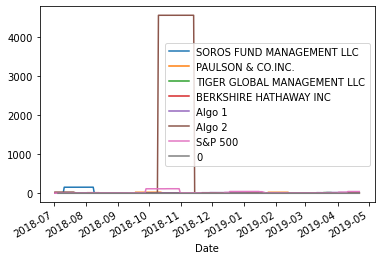

In [278]:
# Rolling
# YOUR CODE HERE
combined_with_bjorn_portfolio_returns.rolling(window=21).std().plot()
#my portfolio returns column is titled "0" and I'm fine with it

In [279]:
Annualized_Standard_Deviation_02 = np.std(combined_with_bjorn_portfolio_returns)*15.8113
print(Annualized_Standard_Deviation_02)

SOROS FUND MANAGEMENT LLC               NaN
PAULSON & CO.INC.                       NaN
TIGER GLOBAL MANAGEMENT LLC             NaN
BERKSHIRE HATHAWAY INC                  NaN
Algo 1                           182.748499
Algo 2                         22953.649806
S&P 500                          674.146839
0                                  0.214299
dtype: float64


In [282]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
Sharpe_Ratio_02 = Annualized_Standard_Deviation_02.mean() / Annualized_Standard_Deviation_02.std()
Sharpe_Ratio_02
#This should return eight values mirroring the abvoe table; not sure why it's just one . . .

0.5250421819759019

In [283]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
Sharpe_Ratio_02.plot(kind = 'bar')
#this won't work as it's just one number. code should be correct

AttributeError: 'float' object has no attribute 'plot'

In [284]:
# Create a correlation analysis
# YOUR CODE HERE
price_correlation_02 = combined_with_bjorn_portfolio_returns.corr()
price_correlation_02

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
SOROS FUND MANAGEMENT LLC,1.000000,-0.036452,0.115727,-0.011620,-0.003815,-0.020985,0.000608,-0.014544
PAULSON & CO.INC.,-0.036452,1.000000,0.052009,0.090907,-0.017074,0.087504,-0.004285,0.016083
TIGER GLOBAL MANAGEMENT LLC,0.115727,0.052009,1.000000,-0.026707,-0.088995,0.013452,-0.017369,0.124645
BERKSHIRE HATHAWAY INC,-0.011620,0.090907,-0.026707,1.000000,0.016494,0.153353,0.008575,-0.055958
Algo 1,-0.003815,-0.017074,-0.088995,0.016494,1.000000,-0.001020,0.001908,0.000139
Algo 2,-0.020985,0.087504,0.013452,0.153353,-0.001020,1.000000,0.002136,-0.094392
S&P 500,0.000608,-0.004285,-0.017369,0.008575,0.001908,0.002136,1.000000,0.079722
0,-0.014544,0.016083,0.124645,-0.055958,0.000139,-0.094392,0.079722,1.000000


In [285]:
# Beta
# YOUR CODE HERE
covariance_02 = combined_with_bjorn_portfolio_returns['0'].cov(combined_with_bjorn_portfolio_returns['S&P 500'])
print(covariance_02)
variance_02 = combined_with_bjorn_portfolio_returns['0'].var()
print(variance_02)
bjorn_beta = covariance_02 / variance_02
print(bjorn_beta)
#This should work too. Calling it a night. -Bjorn

KeyError: '0'